<center>
    <h1> Qiskit Metal: </ h1>
    <h1> A full-stack SC quantum chip design tool </h1>
</ center>

<br />
<center>
    This presentation is intended for 2022 Annual Symposium.
</ center>

<br />

<center> <u> Huiqi Xue at Jan 16ᵗʰ, 2023 </u> </center>

Qiskit Metal: A full-stack SC quantum chip design tool

**Contents**

- What Metal does
- Create a design
- Analyze the design
- Sweep data
- Hamiltonian analysis

---
**Contents**

- ▶ What Metal does
- Create a design
- Analyze the design
- Sweep data
- Hamiltonian analysis



## What metal does


**You'll use Qiskit Metal in 4 stages**

1. Choose a design class to instantiate.
2. Add and modify components (qubits, coplanar wave guides, etc.).
3. With the aid of Ansys, use *Lumped Object Model* (LOM) or *Energy Participation Ratio* (EPR) method to analyze.
4. Export to GDS file for Fabrication.

- A visualization

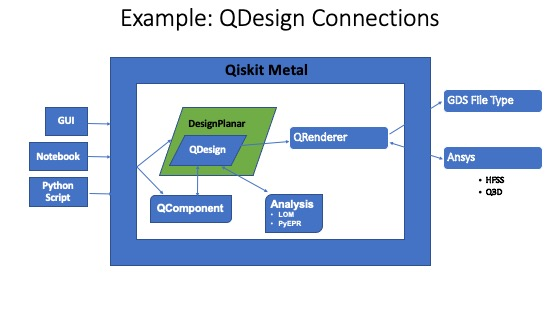

---
**Contents**

- What Metal does
- ▶ Create a design
- Analyze the design
- Sweep data
- Hamiltonian analysis


## Create a design

- Initiate a design class
- Add a default transmon
- Add a transmon with 4 connection pads
- Create a chip with 4 qubits
- Connect the qubits with CPW
- Various types of routes
- The power of programming

### Initiate a design class

In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw, MetalGUI

In [2]:
design = designs.DesignPlanar()

design.overwrite_enabled = True

In [3]:
# We can also check all of the chip properties to see if we want to change the size or any other parameter. 
# By default the name of chip is "main".
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

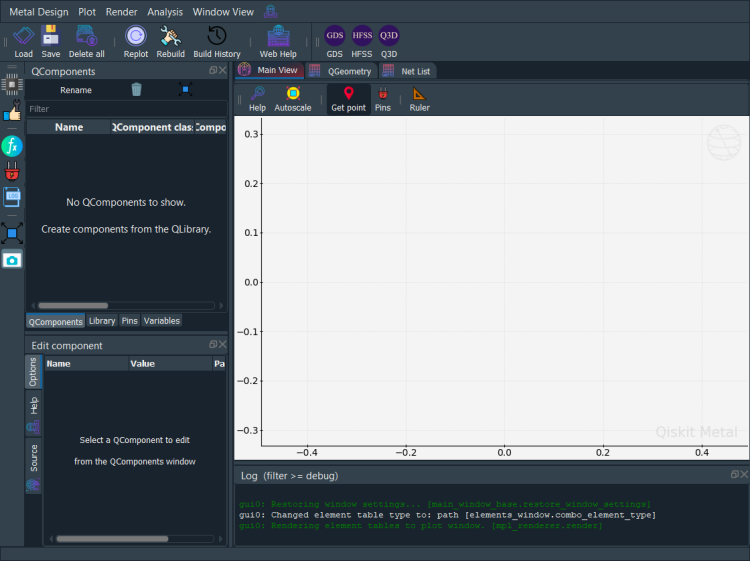

In [4]:
gui = MetalGUI(design)
gui.screenshot()

### Add a default transmon

In [5]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object with name 'Q1' 
q1 = TransmonPocket(design, 'Q1')

gui.rebuild()  # rebuild the design and plot 

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



06:06AM 46s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: OleSetClipboard: Failed to set mime data (application/x-qt-image) on clipboard: COM error 0xffffffff800401d0  (Unknown error 0x0800401d0) (The parameter is incorrect.)



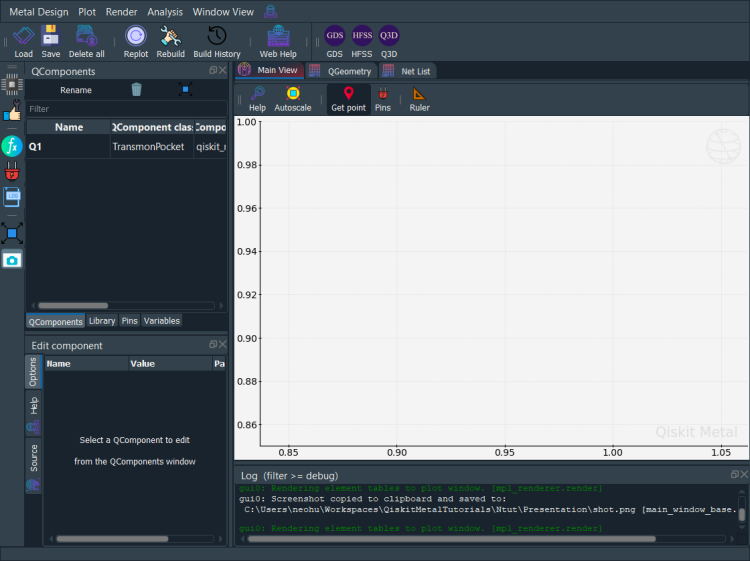

In [6]:
gui.screenshot()

In [7]:
q1 #print Q1 information

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0.0um',                      
  'pos_y'             : '0.0um',                      
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '20um',                       
  'pad_width'         : '455um',                      
  'pad_height'        : '90um',                       
  'pocket_width'      : '650um',                      
  'pocket_height'     : '650um',                      
  'hfss_wire_bonds'   : False,                        
  'q3d_wire_bonds'    : False,                        
  'hfss_inductance'   : '10nH',                       
  'hfss_capacitance'  : 0,                            
  'hfss_resistance'   : 0,                            
  'hfss_mesh_

### Add a transmon with 4 connection pads

In [8]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(  # pin connecotrs
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='+0.5mm', pos_y='+0.5mm', **options))

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



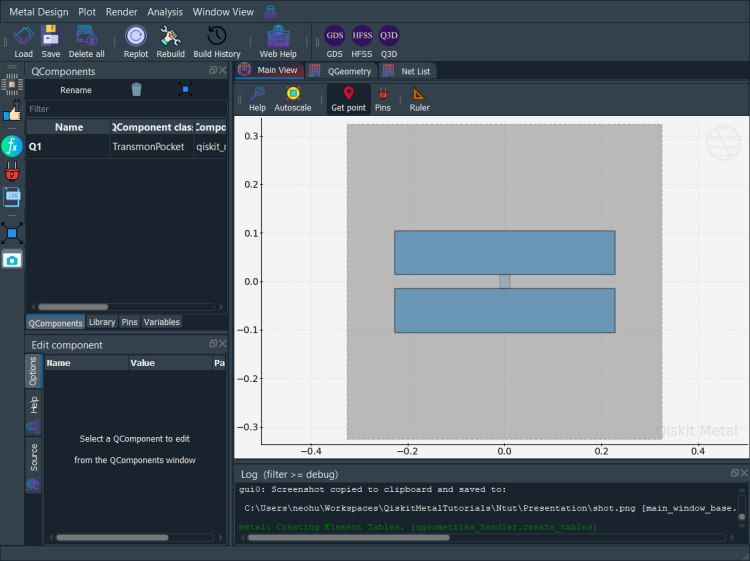

In [9]:
gui.screenshot()

### Create a chip with 4 qubits

In [10]:
design.delete_all_components() 
gui.rebuild() # refresh

Same option for every qubit

In [11]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the deafults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict( 
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

In [12]:
## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.55mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.9mm', orientation = '90', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.55mm', pos_y='+0.0mm', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.9mm', orientation = '90', **options))

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_arr

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



06:06AM 47s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: OleSetClipboard: Failed to set mime data (application/x-qt-image) on clipboard: COM error 0xffffffff800401d0  (Unknown error 0x0800401d0) (The parameter is incorrect.)



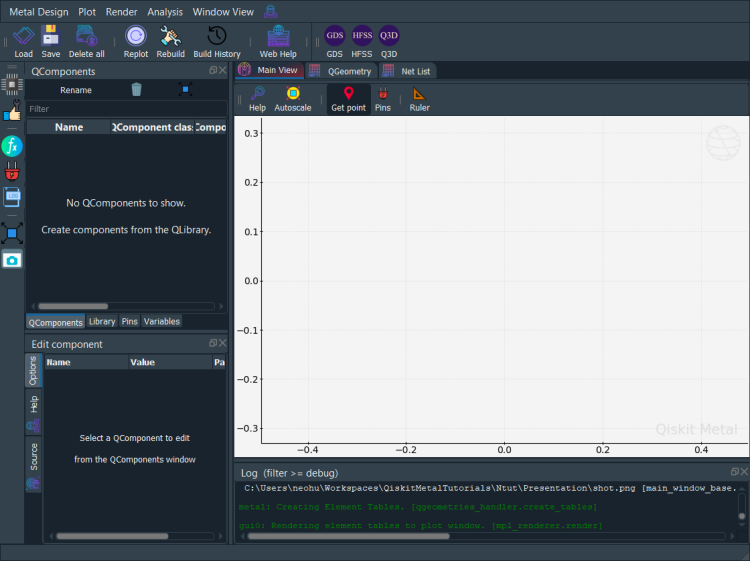

In [13]:
gui.screenshot()

### Connect the qubits with CPW

In [14]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

Same option for every CPW.

In [15]:
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

NameError: name 'Dict' is not defined

Define a `connect()` function that connects `component1@pin1` and `component2@pin2` and return an object of `RouteMeander`

In [65]:
def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight='0.13mm'
        ),
        total_length=length,
    fillet = '90um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

In [16]:
asym = 150
cpw1 = connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

NameError: name 'connect' is not defined

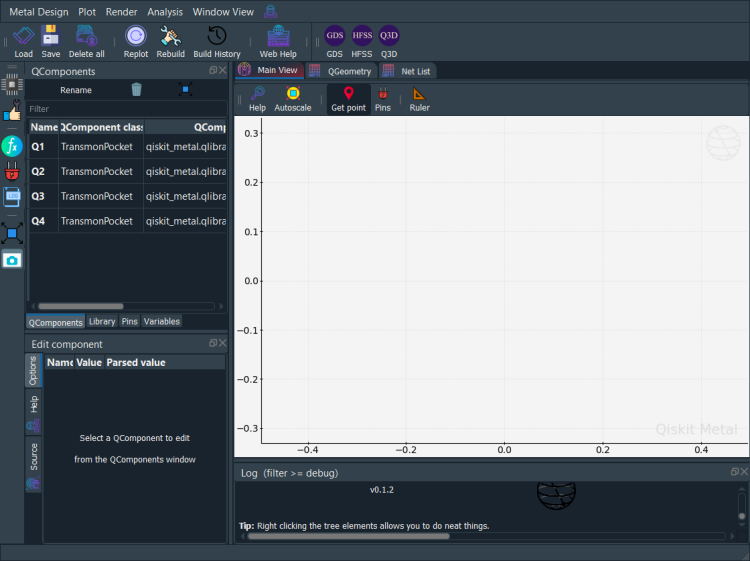

In [17]:
gui.screenshot()

### Various types of routes

- Create any shape of route you like.

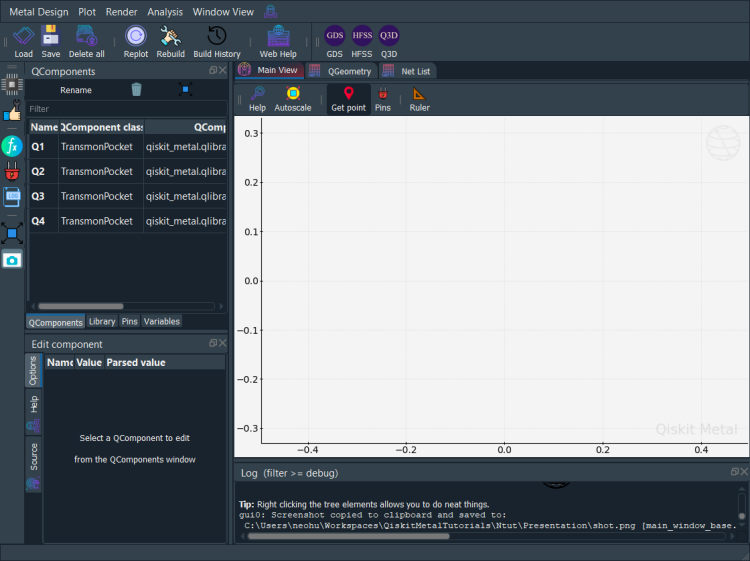

In [18]:
gui.screenshot()

- Basic class: `RouteMeander`

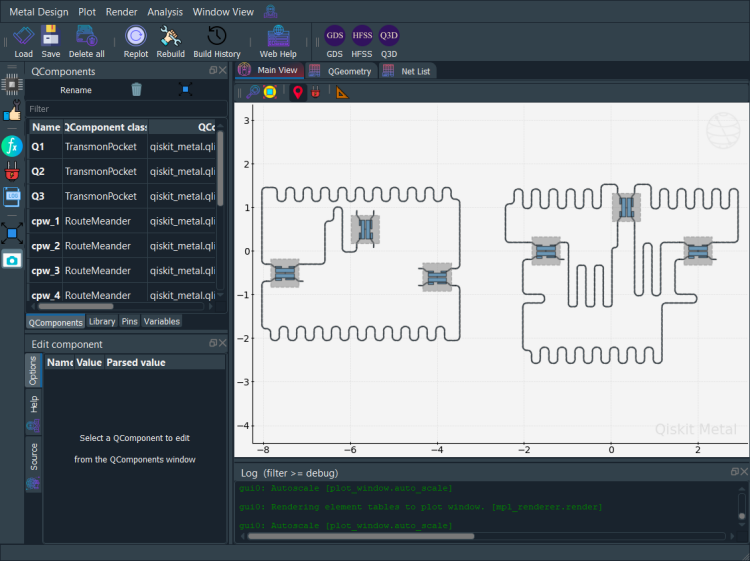

<!-- 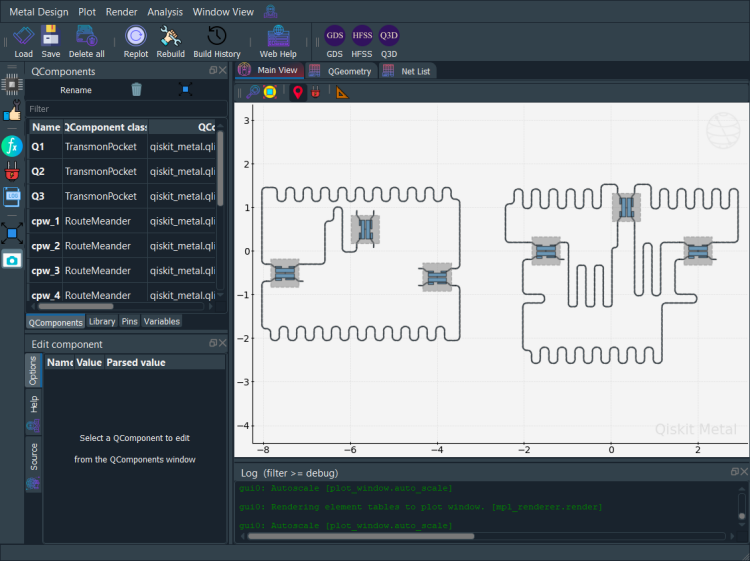 -->

- You can also anchor some points for a route, and let Metal find the path.

Basic class: `RoutePathfinder`

In [19]:
anchors = OrderedDict()
anchors[0] = np.array([-0.452, -0.555])
anchors[1] = np.array([-0.452, -1.5])
anchors[2] = np.array([0.048, -1.5])

options = {'pin_inputs': 
            {'start_pin': {'component': 'Q0', 'pin': 'b'}, 
             'end_pin': {'component': 'Q1', 'pin': 'b'}},
            'lead': {'start_straight': '91um', 'end_straight': '90um'},
            'step_size': '0.25mm',
            'anchors': anchors,
            **ops
           }

qa = RoutePathfinder(design, 'line', options)

NameError: name 'OrderedDict' is not defined

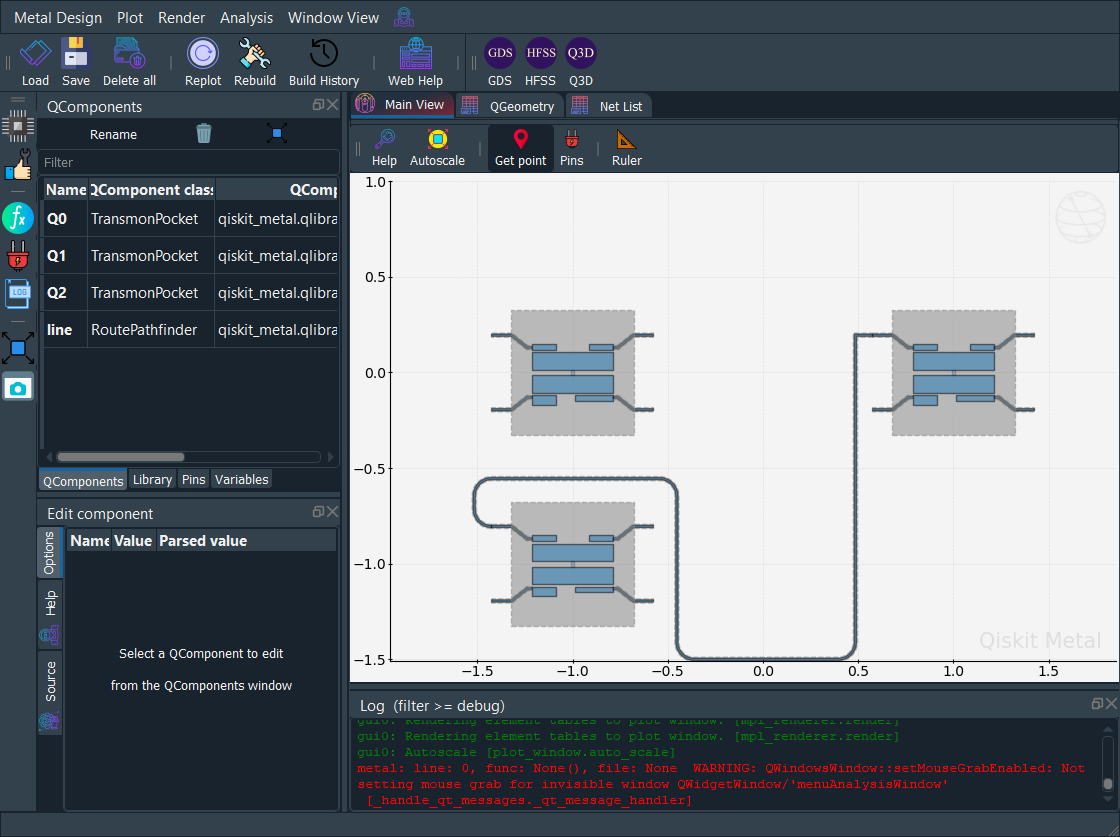


<!-- 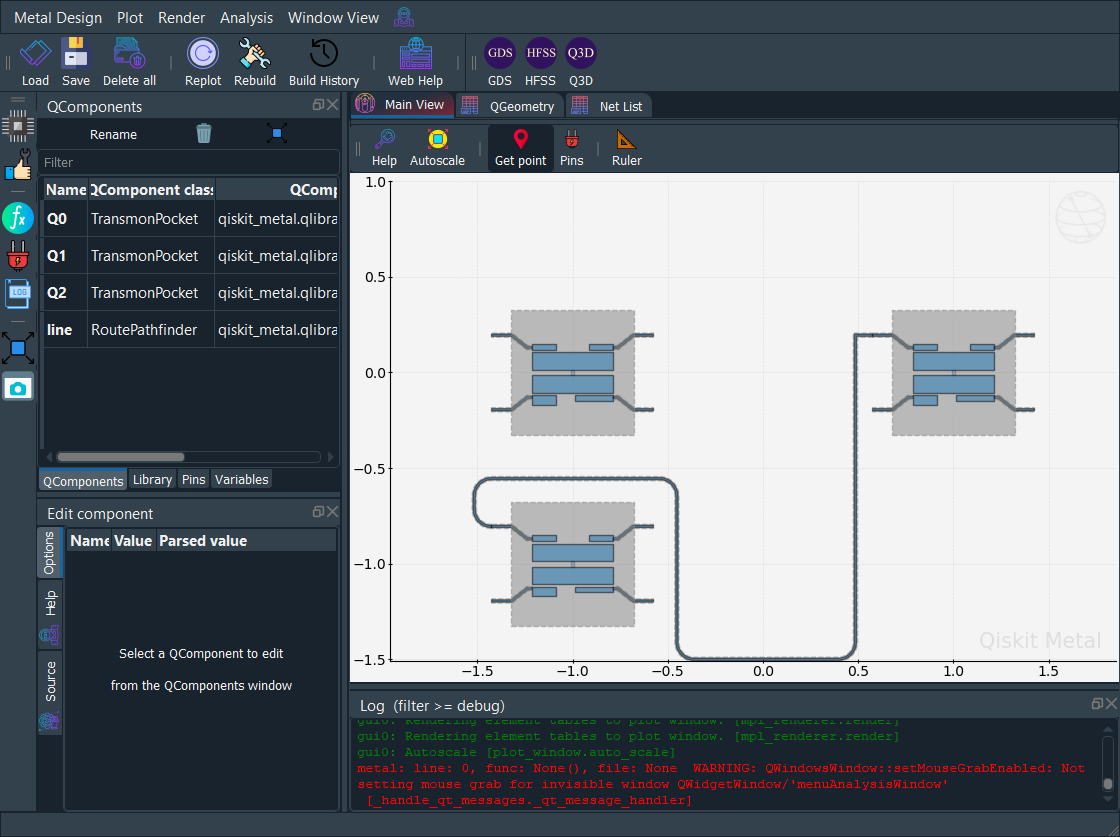 -->

### The power of programming

In [20]:
N_x =4
N_y =3

First we generate the qubits.

In [21]:
#Loop to generate and draw the qubits
for x in range(N_x):
    for y in range(N_y):
        options = dict(...)
        obj=TransmonPocket(design,'Q_'+str(x)+'_'+str(y),options)

TypeError: 'ellipsis' object is not iterable

Next, we generate the route meanders.

In [22]:
for x in range(N_x):
    for y in range(N_y):
        #"upward" connection
        if y<(N_y-1):
            connectorAD = RouteMeander(...)
        #"sideways" connection
        if x<(N_x-1) and (not(x%2 and y==(N_y-1))):
            connectorBC = RouteMeander(...)

TypeError: 'NoneType' object does not support item assignment

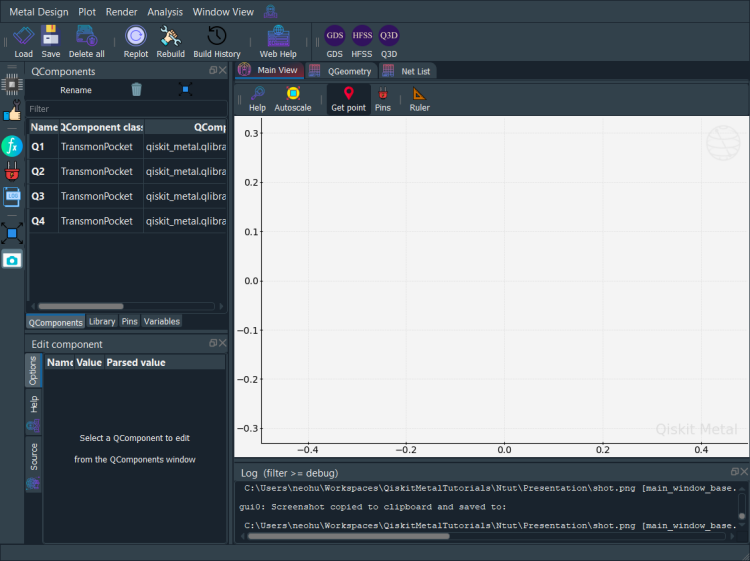

In [23]:
gui.screenshot()

---
**Contents**

- What Metal does
- Create a design
- ▶ Analyze the design
- Sweep data
- Hamiltonian analysis



## Analyze the design


- LOM analysis
- EPR analysis for 1 qubit
- EPR analysis for qubit-resonator system

### LOM analysis

Lumped Object Model method.

1. Create a design with 4 qb and 4 cpws.

In [24]:
design = designs.DesignPlanar()

# Add qubits...
TransmonPockets(...)
# Add routes...
RouteMeander(...)

NameError: name 'TransmonPockets' is not defined

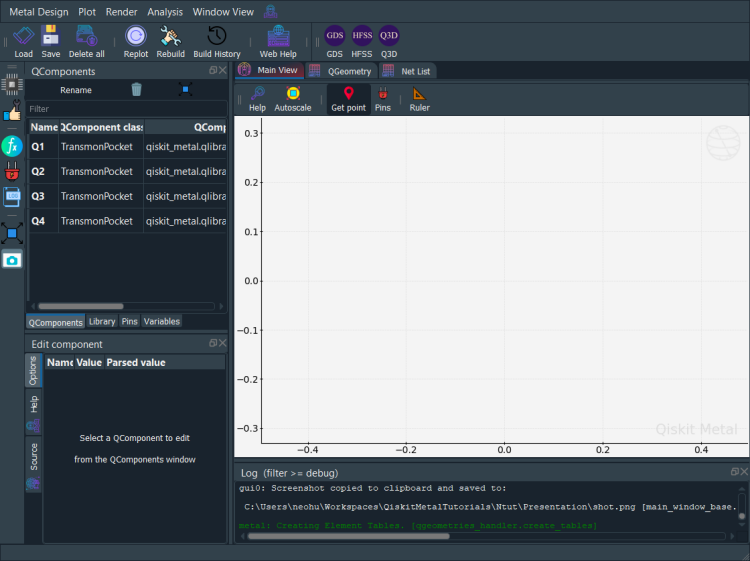

In [25]:
gui.screenshot()

2. Initialize an `LOManalysis`

In [26]:
from qiskit_metal.analyses.quantization import LOManalysis

analysis = LOManalysis(design, "q3d")

In [27]:
analysis.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

3. Run *finite element analysis* with Ansys to calculate **capacitance matrix**.

In [28]:
analysis.sim.setup.freq_ghz = 4.8
# vvvvvvvvvvvvvvvvvv
analysis.sim.run()
# ^^^^^^^^^^^^^^^^^^
analysis.sim.capacitance_matrix

INFO 06:07AM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:07AM [load_ansys_project]: 	Opened Ansys App
INFO 06:07AM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 06:07AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/neohu/Workspaces/AnsysElectronics2023R1/
	Project:   Project1
INFO 06:07AM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
INFO 06:07AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:07AM [connect]: 	Connected to project "Project1" and design "Qbit_hfss" 😀 



AttributeError: 'QQ3DRenderer' object has no attribute 'add_eigenmode_setup'

4. Use capacitance matrix to perform LOM analysis to get $f_Q, E_J, E_C$ etc.

In [29]:
analysis.setup.junctions = Dict({'Lj': 12.31, 'Cj': 2})
analysis.setup.freq_readout = 7.0
analysis.setup.freq_bus = [6.0, 6.2]

# vvvvvvvvvvvvvvvvvv
analysis.run_lom()
# ^^^^^^^^^^^^^^^^^^

analysis.lumped_oscillator_all

NameError: name 'Dict' is not defined

### EPR analysis for 1 qubit

Energy Participation Ratio method.

1. Initialize `EPRanalysis`

In [30]:
from qiskit_metal.analyses.quantization import EPRanalysis

analysis_qb = EPRanalysis(design, "hfss")

In [31]:
# example: update single setting
analysis_qb.sim.setup.max_passes = 6
analysis_qb.sim.setup.vars.Lj = '11 nH'
# example: update multiple settings
analysis_qb.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

pprint(analysis.sim.setup)

NameError: name 'pprint' is not defined

2. Analyze eigenmodes of Q1

In [32]:
analysis_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)

INFO 06:07AM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:07AM [load_ansys_project]: 	Opened Ansys App
INFO 06:07AM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 06:07AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/neohu/Workspaces/AnsysElectronics2023R1/
	Project:   Project1
INFO 06:07AM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
WARNING 06:07AM [connect_setup]: 	No design setup detected.
WARNING 06:07AM [connect_setup]: 	Creating eigenmode default setup.
INFO 06:07AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:07AM [connect]: 	Connected to project "Project1" and design "Qbit_hfss" 😀 

INFO 06:07AM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
06:07AM 56s WARNING [get_unique_component_ids]: The component=Q1 in highlight_qcomponents not in QDesign.
06:07AM 56s WARNING [render_design]: Unable to proceed with render

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024349), None)

3. Convergence plot

In [33]:
analysis_qb.sim.plot_convergences()

TypeError: 'Dict' object is not callable

In [34]:
analysis_qb.sim.convergence_f

{}

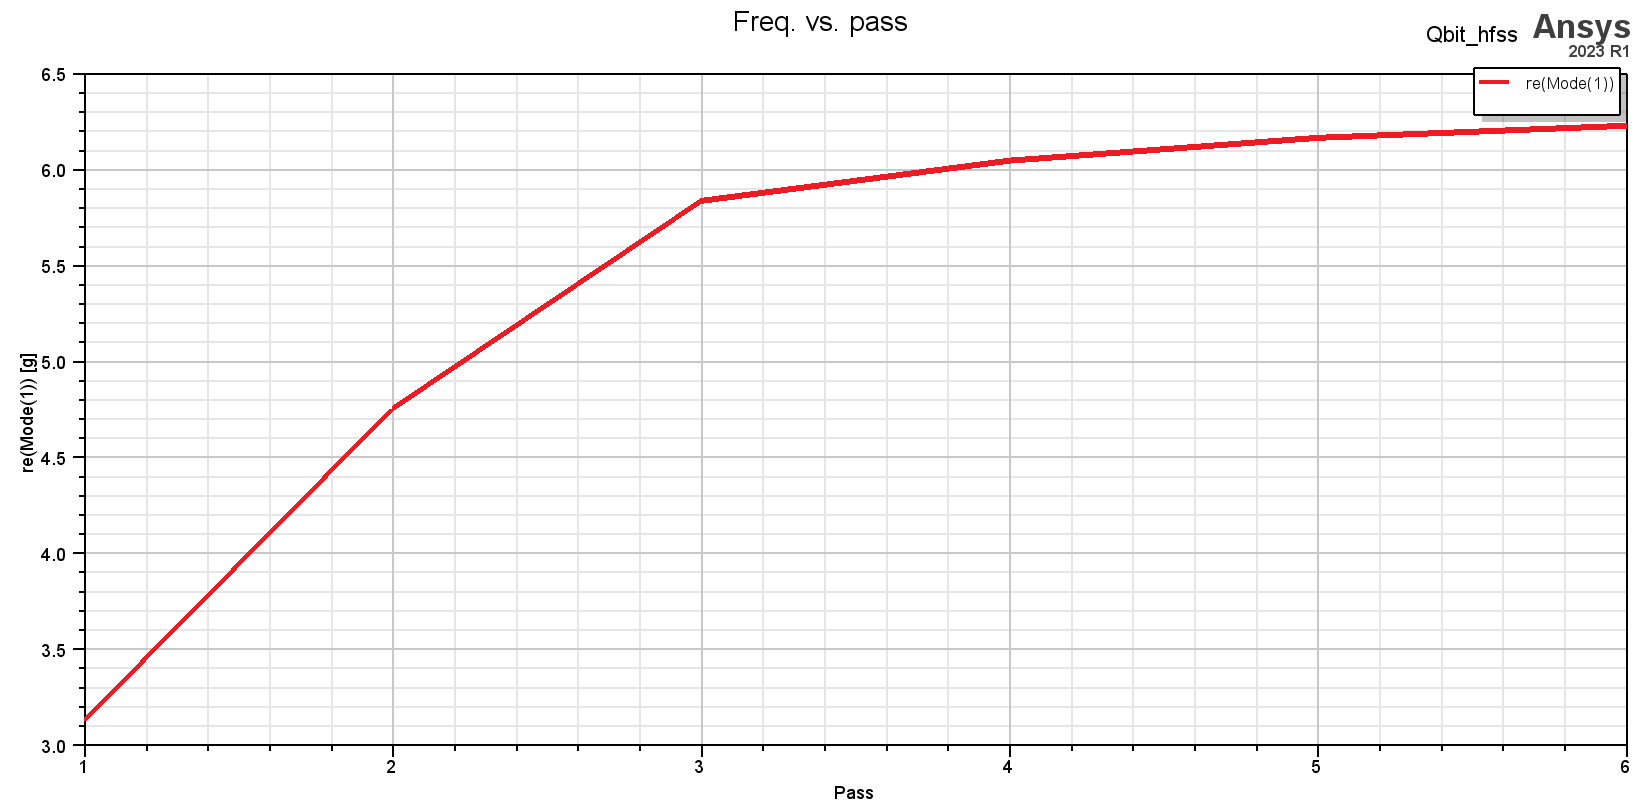

In [35]:
analysis_qb.sim.save_screenshot()

com_error: (-2147023170, 'The remote procedure call failed.', None, None)

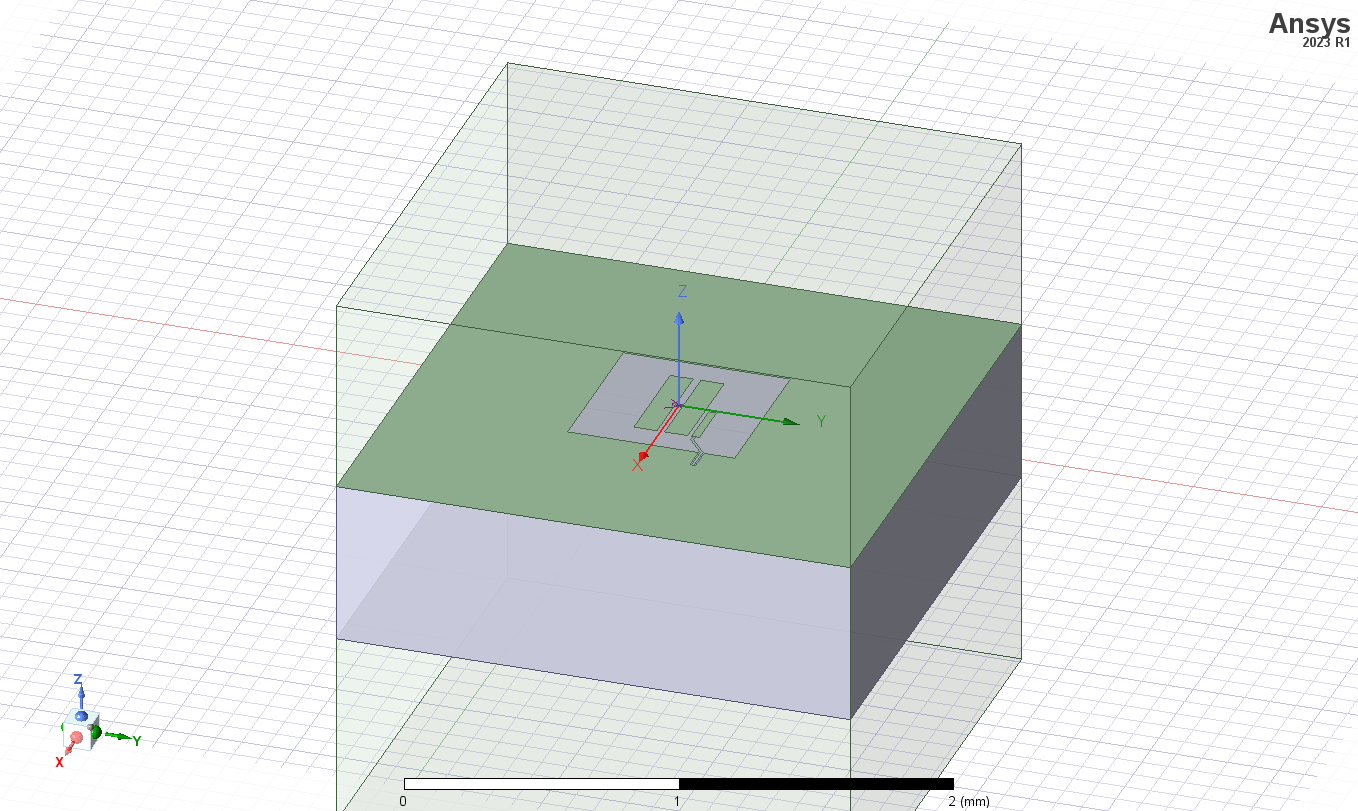

In [36]:
analysis_qb.sim.plot_fields('main')
analysis_qb.sim.save_screenshot()

com_error: (-2147023174, 'The RPC server is unavailable.', None, None)

Chip's E-field

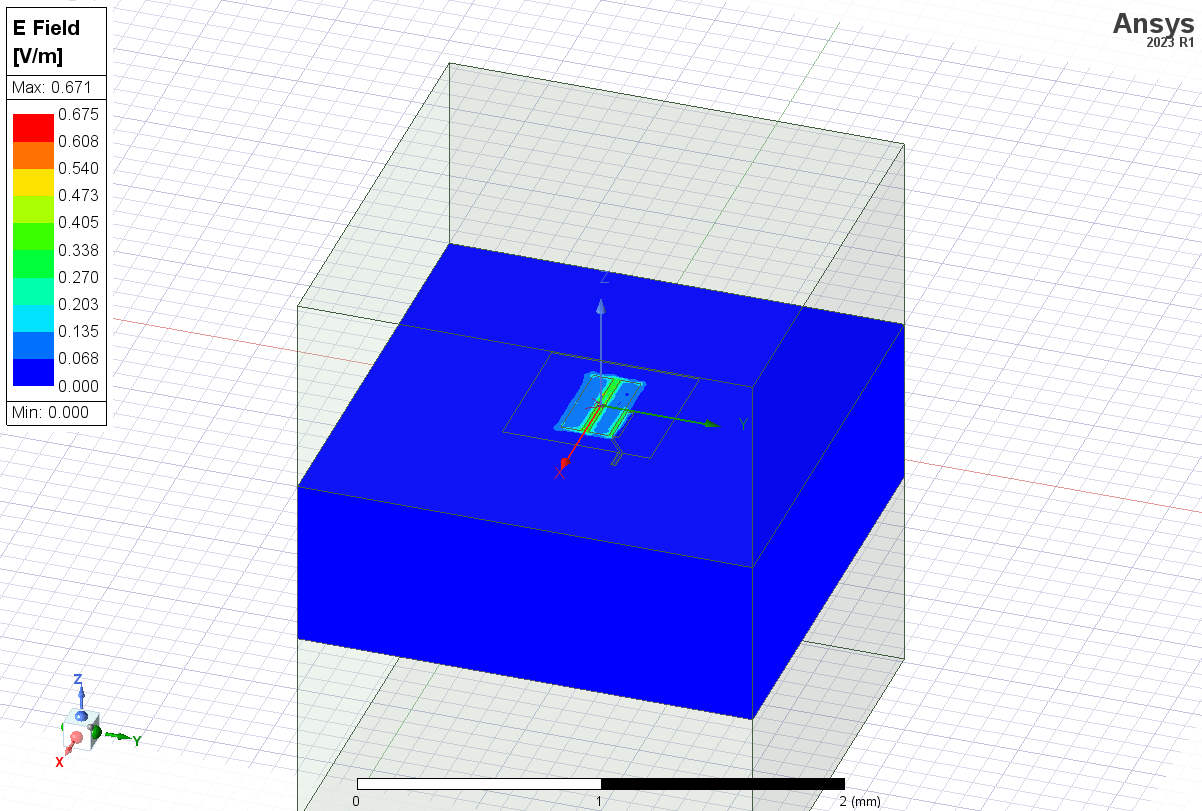

Run EPR!

In [37]:
analysis_qb.run_epr()

AttributeError: GetActiveProject.GetVariables

### EPR analysis for qubit-resonator system

Energy Participation Ratio method

Add a resonator to design

In [38]:
RouteMeander(design, ...)

TypeError: 'NoneType' object does not support item assignment

Initialize a new analysis object.

We need to analyze 2 modes for there are two components.

In [39]:
analysis_q_res = EPRanalysis(design, "hfss")

analysis_q_res.sim.setup.n_modes = 2
analysis_q_res.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

Use Ansys to calculate eigen modes.

In [40]:
analysis_q_res.sim.run(name="TransmonResonator",
                 components=['Q1', 'readout', 'open_to_ground'],
                 open_terminations=[('readout', 'end')])
analysis_q_res.sim.plot_convergences()

com_error: (-2147023174, 'The RPC server is unavailable.', None, None)

In [41]:
analysis_q_res.sim.save_screenshot()  # optional

com_error: (-2147023174, 'The RPC server is unavailable.', None, None)

In [42]:
analysis_q_res.sim.plot_fields('main', eigenmode=1)
analysis_q_res.sim.save_screenshot()

com_error: (-2147023174, 'The RPC server is unavailable.', None, None)

Run EPR!

In [43]:
analysis_q_res.run_epr()

AttributeError: GetActiveProject.GetVariables

---
**Contents**

- What Metal does
- Create a design
- Analyze the design
- ▶ Sweep data
- Hamiltonian analysis



## Sweep data

- Capacitance matrix
- Eigenmode matrix

### Capacitance matrix

Lumped Objecgt Model method

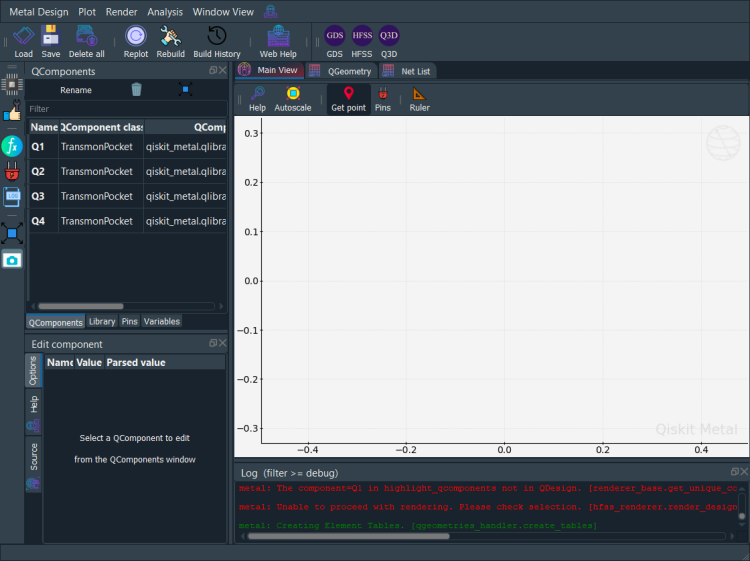

In [44]:
design = designs.DesignPlanar()
...
gui.screenshot()

In [45]:
c1 = LOManalysis(design, "q3d")

Prepare data to pass as arguments for method run_sweep().

In [46]:
render_design_argument_qcomps = ['Q1']

render_design_argument_endcaps = [('Q1', 'readout'), ('Q1', 'bus1'),('Q1', 'bus2')]


Sweep the qubit-1's `pad_gap`.

In [47]:
sweep_data, return_code = c1.run_sweep(q1.name,
                                       'pad_gap',
                                       ['20um', '30um', '40um'],
                                       render_design_argument_qcomps,
                                       render_design_argument_endcaps,
                                       design_name="GetCapacitance",
                                       box_plus_buffer=True)

Sweep data is stored for each sweep value.

In [48]:
sweep_data.keys()

dict_keys([])

Let's see $E_C$ for each `pad_gap` value.

In [49]:
from pandas import DataFrame

ec_val = []
for opt_val in sweep_data.keys():
    ec_val.append([opt_val,sweep_data[opt_val]['variables']['lumped_oscillator']['EC']])

df=DataFrame(ec_val,columns = ['Sweep Value', 'Ec'])
df

,Sweep Value,Ec


### Eigenmode matrix

Energy Participation Ratio method

Sweep the readout resonator's `total_length`.

In [50]:
all_sweeps, return_code = eig_qres.run_sweep(readout.name,
                                             'total_length', 
                                             ['10mm', '11mm', '12mm'],
                                             render_qcomps,
                                             open_terminations,
                                             ignored_jjs=render_ignored_jjs,
                                             design_name="GetEigenModeSolution", 
                                             box_plus_buffer=box_plus_buffer)

NameError: name 'eig_qres' is not defined

Sweep data is stored for each sweep value.

In [51]:
all_sweeps.keys()

NameError: name 'all_sweeps' is not defined

For example this is the data for `total_length = 10mm`

In [52]:
all_sweeps['10mm']

NameError: name 'all_sweeps' is not defined

In [53]:
all_sweeps['10mm']['sim_variables']['convergence_f']

NameError: name 'all_sweeps' is not defined

---
**Contents**

- What Metal does
- Create a design
- Analyze the design
- Sweep data
- ▶ Hamiltonian analysis




## Hamiltonian analysis

- QHO wave function plot
- Cooper-pair-box Hamiltonian and eigenvalue plot
- Charge Dispersion
- Energy Level Differences
- Anharmonicity
- Dephasing Time (T2)

### QHO wave function plot

Quantum Harmonic Oscillator with Metal built-in function

In [54]:
from qiskit_metal.analyses.hamiltonian.HO_wavefunctions import wavefunction

In [55]:
# Let's define the range of x-axis values (representating charge) to be from (-5,5) 
x = np.linspace(-5,5,100)

# Let's plot the first five energy levels (N=0 through N=4) of the harmonic oscillator
# We'll just take L=C=1.0 for simplicity 
plt.plot(x, wavefunction(1.0, 1.0, 0, x), '#0403FD') # N=0; ground state (black)
plt.plot(x, wavefunction(1.0, 1.0, 1, x), '#2A00D5') # N=1; first excited state (blue)
plt.plot(x, wavefunction(1.0, 1.0, 2, x), '#63009E') # N=2; second excited state (red)
plt.plot(x, wavefunction(1.0, 1.0, 3, x), '#A1015D') # N=3; third excited state (green)
plt.plot(x, wavefunction(1.0, 1.0, 4, x), '#FE0002') # N=4; fourth excited state (yellow) 
plt.xlabel("Charge [Q]")
plt.ylabel("Wavefunction [Psi]")

# show the plot
plt.show()

NameError: name 'np' is not defined

### Cooper-pair-box Hamiltonian and eigenvalue plot

This module models the transmon qubit in the cooper-pair charge basis, assuming wrapped junction phase variable. The Hamiltonian is given by: 

$$
\hat{H}=4E_{C}\left(\hat{n}-n_{g}\right)-E_{J}\cos\left(\hat{\phi}\right)\,,
$$

where $E_{C}$ is the charging energy, $E_{J}$ is the Josephson energy, $\hat n$ is the number of Cooper pairs transferred between charge islands, $\hat{\phi}$ is the gauge-invariant phase difference between charge islands, and $n_{g}$ is effective offset charge of the device. Expressions for the charging energy, Josephson energy and offset charge can be written as:

$$
E_{C}=\frac{e^{2}}{2C_{\Sigma}}\,,\qquad n_{g}=-\frac{C_{d}\dot{\Phi}_{s}\left(t\right)}{2e}\:,\qquad E_{J}=\frac{\phi_{0}^{2}}{L_{J}}\,,
$$

where $C_{\Sigma} = C_{J}+C_{B}+C_{g}$ (the sum of the Josephson capacitance, shunting capacitance and gate capacitance), $L_{J}$ is the inductance of the Josephson junction, and $\phi$ is the magnetic flux. 

The variables are
$$
\hat{\phi}\equiv\frac{\hat{\Phi}}{\phi_{0}},\qquad\hat{n}\equiv\frac{\hat{Q}}{2e}\,,
$$

Observe that $\hat \phi$ and $\hat n$ are both dimensiuonless, and they obey the commutation relationship:

$$
[\hat{\phi}, \hat{n}] = i
$$


The Hamiltonian can be written in the charge ($\hat n$) basis as: 

$$H=4E_\text{C}(\hat{n}-n_g)^2-\frac{1}{2}E_\text{J}\sum_n(|n\rangle\langle n+1|+\text{h.c.}),$$
Where $\hat{n} = \sum_{n=-\inf}^{\inf} |n\rangle\langle n|$

We will use `Hcpb` class (Hamiltonian-model for cooper-pair-box) in Metal package.

In [56]:
from qiskit_metal.analyses.hamiltonian.transmon_charge_basis import Hcpb

Create a cpb Hamiltonian with $E_C$, $E_J$ and offset charge $n_g$

In [57]:
H_norm = Hcpb(nlevels=2, Ej=E_J, Ec=E_C, ng=0.5)

NameError: name 'E_J' is not defined

Normalize the calculated energies by the 0 → 1 transition state energy

In [58]:
# we'll normalize the calculated energies by the 0->1 transition state energy evaluated at the degenercy point (ng=0.5)
norm = H_norm.fij(0,1)

# Next we'll empty lists to the first three eigenvalues (m=0, m=1, m=2):
E0 = [] 
E1 = [] 
E2 = []

# For a given value of offset charge (ng, represented by x) we will calculate the CPB Hamiltonian using the previously assigned values of E_J and E_C. Then we calculate the eigenvalue for a given value of m.
for i in x: 
    H = Hcpb(nlevels=3, Ej=E_J, Ec=E_C, ng=i)
    E0.append(H.evalue_k(0)/norm)
    E1.append(H.evalue_k(1)/norm)
    E2.append(H.evalue_k(2)/norm)

NameError: name 'H_norm' is not defined

In [59]:
# define the minimum of E0 and set this to E=0
floor = min(E0) 
 
plt.plot(x, E0 - floor, 'k')
plt.plot(x, E1 - floor, 'r')
plt.plot(x, E2 - floor, 'b')
plt.show()

NameError: name 'E0' is not defined

### Charge Dispersion

The peak-to-peak value of the charge dispersion for the mth energy level is given by the expression: $\epsilon_{m} = E_{m}(n_{g}=0.5) - E_{m}(n_{g}=0.0)$. We can plot $\epsilon_{m}/E_{01}$ as a function of $E_{J}/E_{C}$ for the first few energy levels and reproduce the figure published in Phys. Rev. A 76, 042319 (2007) (Figure 4(a)). 

In [60]:
x = np.linspace(1,140,101)           # this this ratio of Ej/Ec which will go on the x-axis. 
for i in x:
    E_j = i*E_c 
    H_zero = Hcpb(nlevels=15, Ej=i*E_c, Ec=E_c, ng=0.0)
    H_half = Hcpb(nlevels=15, Ej=i*E_c, Ec=E_c, ng=0.5)
    
    ...

NameError: name 'np' is not defined

Plot charge dispersion w.r.t. $E_{J}/E_{C}$.

In [61]:
plt.plot(x, epsilon0, 'k', label="m=0")
...

NameError: name 'plt' is not defined

### Energy Level Differences

We can also evaluate the energy level difference ($E_{m0} = E_{m} - E_{0}$) evaluated at the degeneracy point ($n_{g}=0.5$) and compare to Fig. 4(b) of Phys. Rev. A 76, 042319 (2007). To do this, we just need to create empty lists for the energy levels ($E_{0}$ through $E_{3}$) as well as the energy level differences ($E_{00}$ through $E_{30}$.) 

In [62]:
plt.plot(x,E00,'k',label="m0")
...

NameError: name 'plt' is not defined

### Anharmonicity

- We know that for the transmon qubit, having the Josephson Energy much larger than the charging energy ($E_{J} >> E_{C}$) results in a decrease in anharmonicity.

- The *absolute anharmonicity* is defined as $\alpha = E_{12} - E_{01}$, while the *relative anharmonicity* is defined as $\alpha_{r} = \alpha/E_{01}$. 

Sweep over x and at each value we'll calculate both the **absolute** and **relative** anharmonicity. 

In [63]:
plt.plot(x,alpha)
...

NameError: name 'plt' is not defined

Indeed we see that the anharmonicity decays with the inverse of $E_{J}/E_{C}$ for small values of $E_{J}/E_{C}$ before reaching a minimum just before $E_{J}/E_{C} \approx 20.0$, then changing sign and approaching zero as $E_{J}/E_{C}$ approaches infinity. This matches very closely to the results found in Figure 5 of Phys. Rev. A 76, 042319 (2007). 

### Dephasing Time (T2)

We can estimate the qubit dephasing time (T2) due to charge noise by the following expression: $T_{2} = \frac{\hbar}{A\pi |\epsilon_{1}|}$ where $A$ is on the order of $1E-4$ according to Phys. Rev. A 76, 042319 (2007). Since this is essentially just the inverse of the charge dispersion for $\epsilon_{1}$, we can easily calculate T2 as a function of $E_{J}/E_{C}$ with the following:

In [64]:
...
plt.plot(x, T2)
plt.yscale("log")

NameError: name 'plt' is not defined

Indeed, we see that the dephasing time increases exponentially with increasing $E_{J}/E_{C}$, which is one of the critical features of the transmon qubit. By increasing the $E_{J}/E_{C}$ ratio, we reduce sensitivity to charge noise without sacrificing too much anharmonicity, resulting in greatly improved dephasing time. This plot matches very closely to Fig. 5(c) in Phys. Rev. A 76, 042319 (2007).

Ending on next page ...

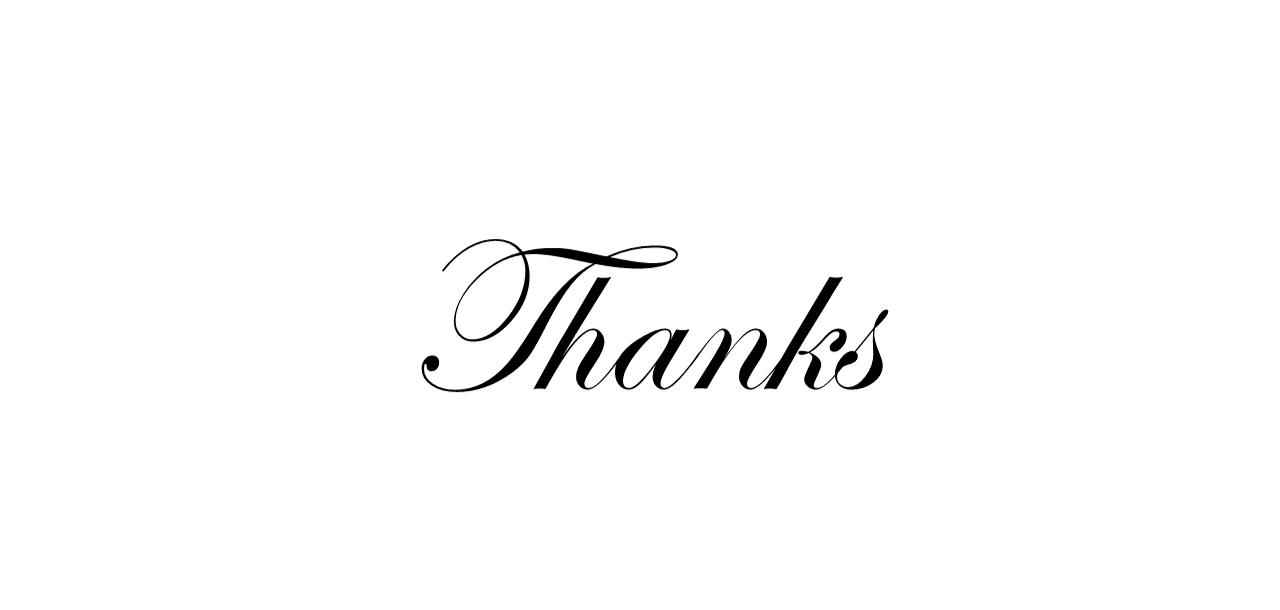